In [1]:
!pip install --pre pycaret pyod

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

import umap
import umap.plot

from pycaret.classification import *
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, \
recall_score, auc, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import scipy.stats as stats


from pyod.models.knn import KNN
from pyod.utils.example import visualize

Import the Dataset

In [3]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [7]:
df.isnull().sum().max()

0

In [8]:
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

0    284315
1       492
Name: class, dtype: int64


0    0.998273
1    0.001727
Name: class, dtype: float64


In [9]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [11]:
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 1.00       113
0.00        27
99.99       27
0.76        17
0.77        10
          ... 
294.90       1
720.38       1
31.91        1
1354.25      1
42.53        1
Name: amount, Length: 259, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [12]:
print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


In [13]:
df.shape

(284807, 31)

In [14]:
df['time'] = df['time'].apply(lambda sec : (sec/3600))

In [15]:
import math
df['hour'] = df['time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

In [16]:
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [17]:
df['day'].value_counts()

1    144787
2    140020
Name: day, dtype: int64

In [18]:
print("No of transaction Day wise:")
print( df['day'].value_counts())

print("\n")

print("No of fraud transaction Day wise:")
print(df[(df['class'] == 1)]['day'].value_counts())

print("\n")

print("No of genuine transactions Day wise:")
print( df[(df['class'] == 0)]['day'].value_counts())

print("\n")

print("Percentage of fraud transactions Day wise:")
print((df[(df['class'] == 1)]['day'].value_counts()/df['day'].value_counts())*100)

No of transaction Day wise:
1    144787
2    140020
Name: day, dtype: int64


No of fraud transaction Day wise:
1    281
2    211
Name: day, dtype: int64


No of genuine transactions Day wise:
1    144506
2    139809
Name: day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: day, dtype: float64


In [19]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day'],
      dtype='object')

In [20]:
df

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,day
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,47.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23,2
284803,47.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23,2
284804,47.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23,2
284805,47.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23,2


In [21]:
X = df.drop(['time','class','hour','day',],axis=1)
y = df['class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [23]:
clf1 = setup(data = df, 
             normalize= True,
             target = 'class',)

,Description,Value
0,Session id,8927
1,Target,class
2,Target type,Binary
3,Original data shape,"(284807, 33)"
4,Transformed data shape,"(284807, 33)"
5,Transformed train set shape,"(199364, 33)"
6,Transformed test set shape,"(85443, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [24]:
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9868,0.8084,0.9526,0.8729,0.8727,0.8765,45.6740
catboost,CatBoost Classifier,0.9996,0.9786,0.8057,0.9561,0.8721,0.8719,0.8763,40.4410
et,Extra Trees Classifier,0.9996,0.9548,0.7911,0.9617,0.8656,0.8654,0.8708,12.7530
rf,Random Forest Classifier,0.9996,0.9477,0.7908,0.9588,0.8644,0.8642,0.8694,65.5840
knn,K Neighbors Classifier,0.9995,0.9259,0.7794,0.9210,0.8418,0.8415,0.8457,108.6540
lda,Linear Discriminant Analysis,0.9994,0.8983,0.7591,0.8603,0.8011,0.8008,0.8050,0.7230
dt,Decision Tree Classifier,0.9992,0.8866,0.7737,0.7521,0.7596,0.7592,0.7608,6.5870
ada,Ada Boost Classifier,0.9992,0.9673,0.6866,0.8164,0.7356,0.7352,0.7430,22.3580
lr,Logistic Regression,0.9992,0.9772,0.6076,0.8640,0.7079,0.7075,0.7212,1.4880
svm,SVM - Linear Kernel,0.9990,0.0000,0.5377,0.8565,0.6525,0.6520,0.6737,0.3660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [25]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=8927, reg_alpha=0, ...)

In [26]:
best_ = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9952,0.7714,0.9310,0.8438,0.8435,0.8472
1,0.9997,0.9986,0.8571,0.9677,0.9091,0.9089,0.9106
2,0.9993,0.9867,0.6571,0.9200,0.7667,0.7663,0.7772
3,0.9996,0.9974,0.8571,0.9091,0.8824,0.8822,0.8825
4,0.9997,0.9806,0.8235,1.0000,0.9032,0.9031,0.9073
5,0.9996,0.9700,0.7941,1.0000,0.8852,0.8851,0.8910
6,0.9996,0.9941,0.8824,0.9091,0.8955,0.8953,0.8954
7,0.9996,0.9942,0.8235,0.9655,0.8889,0.8887,0.8915
8,0.9994,0.9561,0.7059,0.9231,0.8000,0.7997,0.8069


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
tuned_best = tune_model(best_, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,0.9898,0.8000,0.8000,0.8000,0.7996,0.7996
1,0.9997,0.9958,0.8571,0.9677,0.9091,0.9089,0.9106
2,0.9994,0.9719,0.6857,0.9600,0.8000,0.7997,0.8111
3,0.9996,0.9963,0.8857,0.8857,0.8857,0.8855,0.8855
4,0.9997,0.9689,0.8529,1.0000,0.9206,0.9205,0.9234
5,0.9996,0.9676,0.7647,1.0000,0.8667,0.8665,0.8743
6,0.9997,0.9952,0.9118,0.9118,0.9118,0.9116,0.9116
7,0.9996,0.9891,0.8235,0.9333,0.8750,0.8748,0.8765
8,0.9995,0.9659,0.7647,0.9286,0.8387,0.8385,0.8424


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
pred = predict_model(best_, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9999,0.9931,0.9289,0.9870,0.9571,0.9570,0.9574


In [29]:
pred.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v25,v26,v27,v28,amount,hour,day,class,prediction_label,prediction_score
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,1,0,0,1.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.690000,0,1,0,0,1.0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,1,0,0,1.0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.500000,0,1,0,0,1.0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.989998,0,1,0,0,1.0


In [30]:
evaluate_model(best_)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [32]:
pca = PCA(n_components=6)
X_6d = pca.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_6d, y, test_size=0.30, shuffle=True, random_state=101)

In [34]:
clf1 = KNN()
clf1.fit(X_6d)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [35]:
y_pred = clf1.predict(X_test)

In [36]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [37]:
print("F1: ", f1_score(y_test, y_pred))

F1:  0.026325781546639667


In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the AUC score
roc_auc = auc(fpr, tpr)

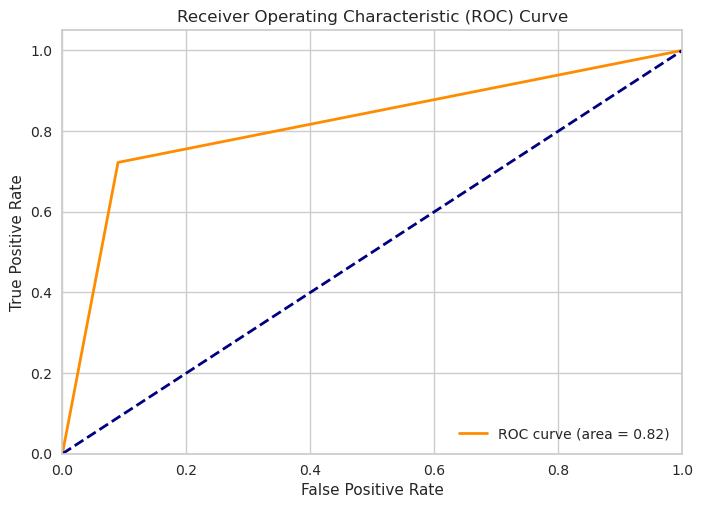

In [39]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

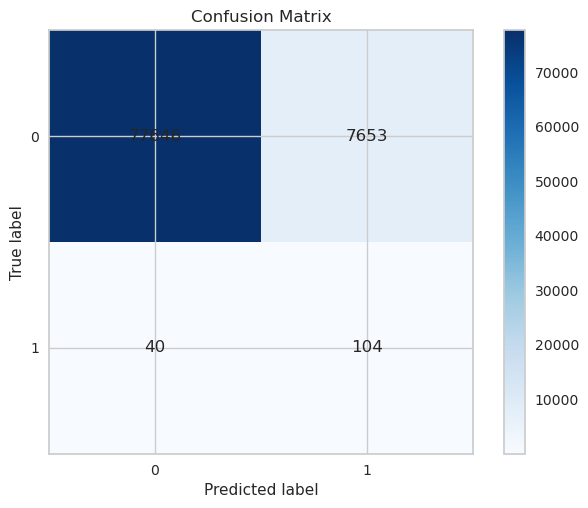

In [40]:
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()